## OC-CCI timeseries analysis for 8-day Chla in CSV format

In [2]:
%matplotlib inline
# Plot
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter, YearLocator

# Data 
import netCDF4 as nc
import numpy as np
import pandas as pd

# Stats
import pymannkendall as mk
from scipy.stats import linregress

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'C:\\Users\\mkmrt\\OneDrive\\Documents\\year_3'

In [4]:
# *NOTE* Please remember to replace my path with your path (pwd) to where your data are:
OC = pd.read_csv("C:\\Users\\mkmrt\\OneDrive\\Documents\\year__3\\20yr\\chlor_a.csv")
OC.head(3)

,date,min,max,mean,std,median
0,2004-01-01T00:00:00,2.432290,3.034370,2.704185,0.032745,2.687559
1,2004-01-09T00:00:00,3.907995,6.429751,5.045079,0.054019,4.913668
2,2004-01-17T00:00:00,3.739128,6.633898,5.768034,0.061125,5.788524


In [5]:
# Make a subset dataframe of the date and mean CHL for further processing
df = pd.DataFrame({'Date':OC['date'], 'Chl':OC['mean']})
# Make date format more friendly to use
df['Date']= pd.to_datetime(df['Date'], format=('%Y-%m-%dT%H:%M:%S'))
df.head(4)


,Date,Chl
0,2004-01-01,2.704185
1,2004-01-09,5.045079
2,2004-01-17,5.768034
3,2004-01-25,6.808638


In [6]:
# How many years in our timeseries:
num = df['Date'].dt.year.nunique()
num


21

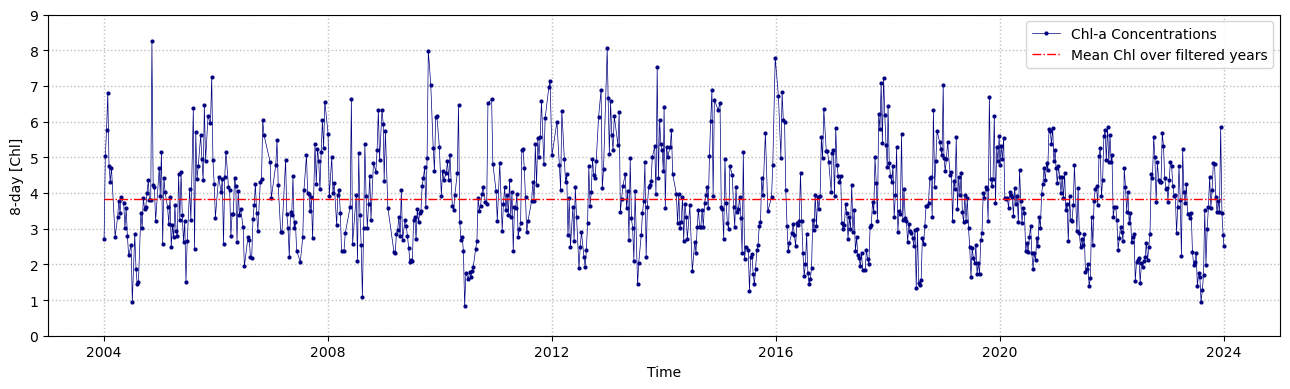

In [7]:
# Filter the DataFrame for dates between 2004 and 2024
df_filtered = df[(df['Date'] >= '2004-01-01') & (df['Date'] <= '2024-01-01')]

# Lineplot of [Chl] with mean
fig1, (ax) = plt.subplots(figsize=(13, 4))  # 1 row, 2 columns
# Plot on the first axis (Chl)
ax.plot(df_filtered['Date'], df_filtered['Chl'], linewidth=0.5, linestyle='-', marker='o', markersize=2, c='navy',
         label='Chl-a Concentrations')

# Mean [Chl] line in red on the first axis, starting from 2013
mean_chl = np.nanmean(df_filtered['Chl'])

# Plot mean line starting from 2004 to 2024
ax.plot(pd.date_range(start='2004-01-01', end='2024-01-01', freq='MS'), 
        [mean_chl] * len(pd.date_range(start='2004-01-01', end='2024-01-01', freq='MS')), 
        color='r', linestyle='-.', linewidth=1, label=f'Mean Chl over filtered years')

# Set y-axis limits for the first axis (Chl)
ax.set_ylim([0, 9])

# Set the x-axis limits to the filtered date range
ax.set_xlim([df_filtered['Date'].min(), df_filtered['Date'].max()])

# Extend the x-axis by one year on either side
start_date = df_filtered['Date'].min() - pd.DateOffset(years=1)
end_date = df_filtered['Date'].max() + pd.DateOffset(years=1)

# Set the x-axis limits to the extended range
ax.set_xlim([start_date, end_date])

# Add labels and grid to the first axis
ax.set_xlabel('Time')
ax.set_ylabel('8-day [Chl]')
ax.grid(True, color='silver', linestyle=':', linewidth=1)
ax.legend()
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()

In [8]:
# Data Prep for Linear regression:
x_date = df_filtered['Date']              # Your actual dates
x_num1 = dates.date2num(x_date)  # Convert dates to numerical format
CHL = df_filtered["Chl"]                  # Your CHL data
# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x_num1, CHL)
# Calculate the trendlines
trend_CHL = slope * x_num1 + intercept

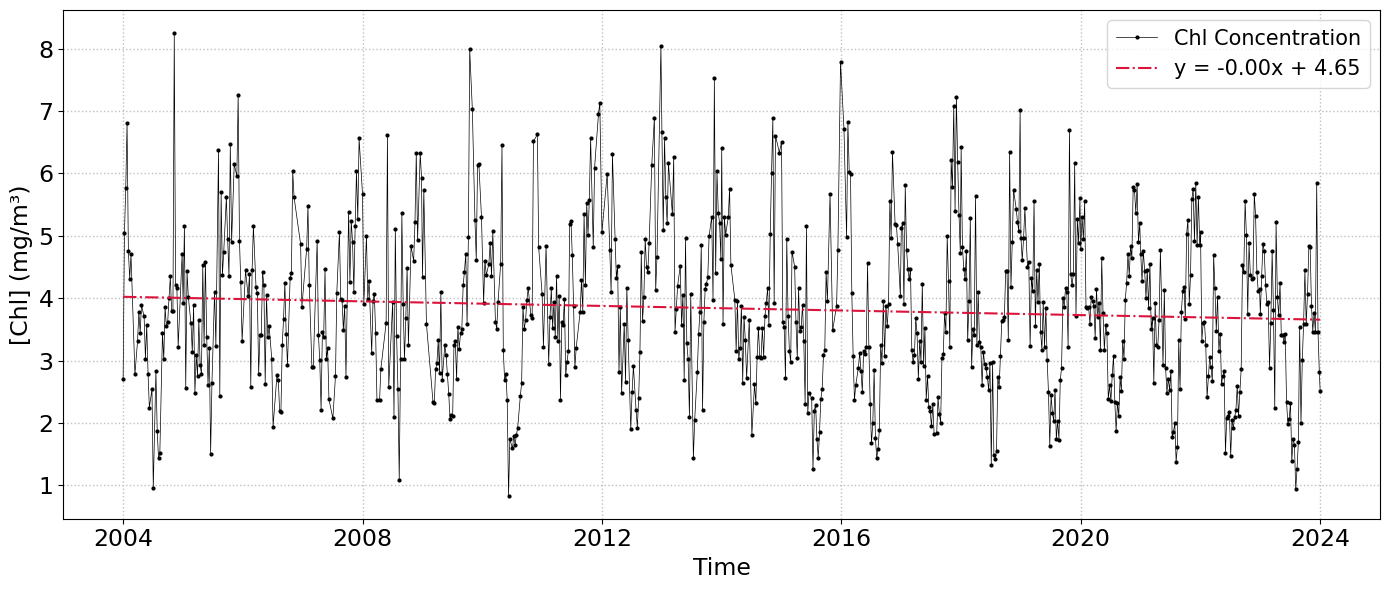

In [11]:
# Lineplot of [Chl] with trendline
fig2, (ax) = plt.subplots(figsize=(14, 6))  
#-----------------------------------------------------------------------------------------------------------
# Plot on the first axis (Chl)
ax.plot(df_filtered['Date'], df_filtered['Chl'], linewidth=0.5, linestyle='-', marker='o', markersize=2, c='black',
         label='Chl Concentration')

# Plot trendline from linear regression
ax.plot(x_date, trend_CHL, linestyle='-.', linewidth=1.5, c='crimson',
        label=f'y = {slope:.2f}x + {intercept:.2f}')

# Add labels and grid to the first axis
ax.set_xlabel('Time')
ax.set_ylabel('8-day [Chl] (mg/m³)')
ax.grid(True, color='silver', linestyle=':', linewidth=1)
ax.legend()

#adjust the font size
ax.tick_params(axis='both', labelsize=17)
ax.legend(prop={'size': 15})
ax.set_xlabel('Time', fontsize=17)
ax.set_ylabel('[Chl] (mg/m³)', fontsize=17)
#-----------------------------------------------------------------------------------------------------------
# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plots
plt.show()

In [9]:
# Are the trends we see significant?
trend = mk.original_test(df['Chl'])
print("Trend in Chlorophyll-a:",trend[0], ", P-value =", ("%.3f" % trend[2]))

Trend in Chlorophyll-a: decreasing , P-value = 0.035
